<a href="https://colab.research.google.com/github/perrijuan/numerical-computing/blob/main/trabalho_3_rascunhos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rascunho do trabalho 3

# questão 1

os 3 algoritimos são focados para obitenção de raizes de uma função logo ambas as tecnicas tem seus pontos fortes e fracos e devem ser usadas nos melhores casos vamos para o metodo mais simples


pode ser interessante usar graficos para plotar as funções

metodo da bisseção

In [ ]:
#metodo da bisseção
import numpy as np
from IPython.display import display, Math
from IPython.display import display, Latex
def bissecao(f,a,b,tolerancia=1e-15,max_interacao=1000):
  #caso base
    if f(a) * f(b)>=0:
        raise ValueError("a função deve ter sinais opostos em a e b")

  #ponto medio
    for i in range(max_interacao):
      c=(a+b)/2
      if abs(f(c))<tolerancia or (b-a) / 2 < tolerancia :
        return c
    #verifica qual sub-intervalo contem a raiz
        if f(c)*f(a)<0:
            b = c
        else:
            a = c
        return c
# a escolha da função para que queiremos encontrara a raiz

def f(x):
  return x**4 - 5*x**2 + 2*x - 54

# valor dos intervalos

a=4
b=3
raiz = bissecao(f, a, b)
print(f"A raiz aproximada é: {raiz}")

A raiz aproximada é: 3.5


In [ ]:
#valores para confirmar o intervalo
coefficients = [1, 0, -5, 2, -54]
raizes = np.roots(coefficients)
raizes


array([-3.26682201+0.j        ,  3.13794634+0.j        ,
        0.06443783+2.29424691j,  0.06443783-2.29424691j])

 Método de Newton-Raphson.

no metodo a seguir citado como newton-raphson temos

valor da raiz é: -1.5096


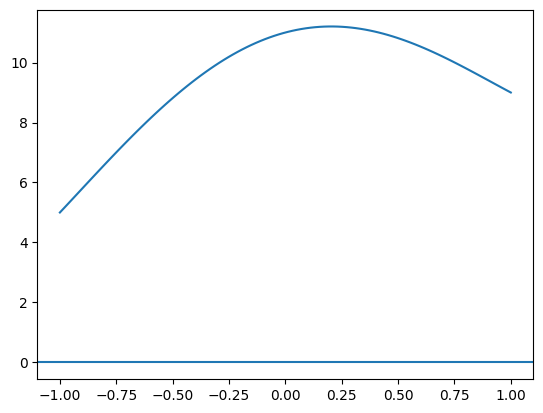

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    return x**4 - 5*x**2 + 2 * x + 11

def derivadafunc(x):
    return 4*x**3 - 10*x + 2

#plotar as retas tangentes que dão enfase ao metodo
xvalores = np.linspace(-1,1,100)
yvalores = f(xvalores)
plt.axhline(0)
plt.plot(xvalores, yvalores)

def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)

        # Verifica se a derivada é zero
        if abs(derivada) < 1e-10:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        h = f(x) / derivada
        x = x - h  # Atualiza x

        # Verifica se a mudança é menor que a tolerância
        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz

x0 = -3  # Escolha um ponto inicial mais próximo da raiz
raiz = newtonraphson(x0)
print(f"valor da raiz é: {raiz:.4f}")



valor da raiz é: -1.5096


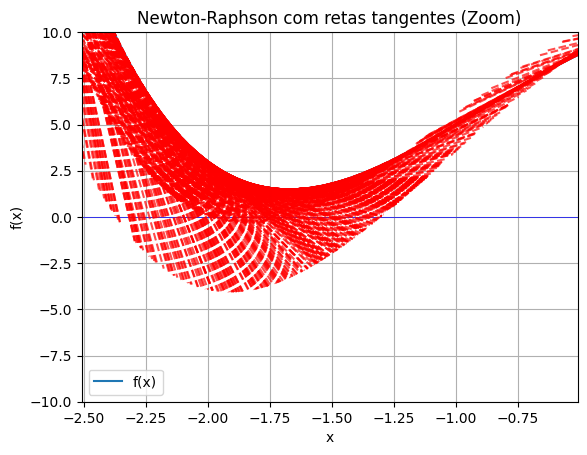

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 5*x**2 + 2 * x + 11

def derivadafunc(x):
    return 4*x**3 - 10*x + 2

# Função para desenhar a reta tangente no ponto (x, y)
def reta_tangente(x, x0):
    return f(x0) + derivadafunc(x0) * (x - x0)

# Plot da função principal
xvalores = np.linspace(-3, 3, 400)
yvalores = f(xvalores)
plt.axhline(0, color="blue", linewidth=0.5)
plt.plot(xvalores, yvalores, label="f(x)")

# Método de Newton-Raphson com plotagem das tangentes
def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)

        # Verifica se a derivada é zero
        if abs(derivada) < 1e-15:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        # Plotando a reta tangente no ponto atual
        x_tangente = np.linspace(x - 0.5, x + 0.5, 100)
        y_tangente = reta_tangente(x_tangente, x)
        plt.plot(x_tangente, y_tangente, linestyle="--", color="red", alpha=0.7)

        h = f(x) / derivada
        x = x - h  # Atualiza x

        # Verifica se a mudança é menor que a tolerância
        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz

# Executa o método e encontra a raiz
x0 = -3  # Ponto inicial
raiz = newtonraphson(x0)
print(f"valor da raiz é: {raiz:.4f}")

# Ajusta os limites dos eixos para fazer zoom na área de convergência
plt.xlim(raiz - 1, raiz + 1)
plt.ylim(-10, 10)  # Ajuste este intervalo conforme necessário para melhor visualização

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson com retas tangentes (Zoom)")
plt.grid(True)
plt.show()


metodo da secante

plotar as retas secantes e tangentes que dão nome para a aproximação do metodo

esse metodo tem como uso resolver um problema que o metodo anterior ele cria pois gerar que tem a necessidade de resolver a derivada, sendo uma tarefa complexa pois dependendo da função nem sempre sera possivel achar uma derivada e sua raiz, e isso foi um problema que tive quando quis derivadas e achar a raiz de uma função de grau 4, sendo um grau elevado não achava a raiz no em intervalos simples, sendo necessario o uso de biblotecas terceiras para achar um intervalo onde teria uma raiz da eq, isso gera problemas e o metodo da secante tenta solucionar

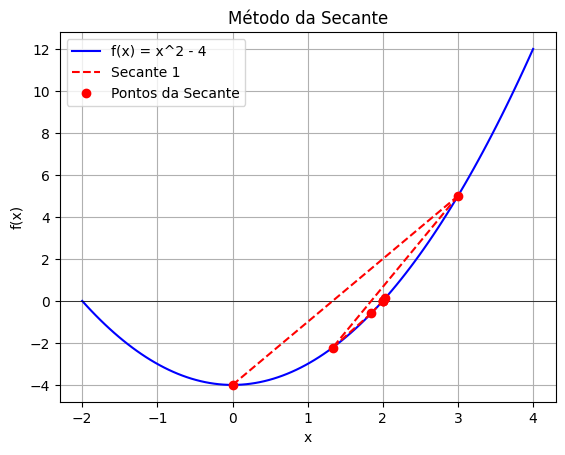

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a função para a qual queremos encontrar a raiz
def f(x):
    return x**2 - 4  # Exemplo: a raiz é x = 2 ou x = -2

# Implementa o método da secante e armazena os pontos intermediários para plotar
def secante_plot(f, x0, x1, epsilon=1e-5, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [f(x0), f(x1)]

    for _ in range(N_max):
        if abs(f(x1)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(f(x2))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y

# Pontos iniciais e chamada da função secante
x0, x1 = 0, 3  # Escolha inicial para encontrar a raiz em torno de x = 2
pontos_x, pontos_y = secante_plot(f, x0, x1)

# Preparação do gráfico
x_vals = np.linspace(-2, 4, 100)  # Intervalo para o eixo x
y_vals = f(x_vals)

# Plot da função
plt.plot(x_vals, y_vals, label="f(x) = x^2 - 4", color="blue")
plt.axhline(0, color="black", linewidth=0.5)  # Linha y=0 para referência

# Plot das secantes em cada iteração
for i in range(1, len(pontos_x) - 1):
    x_sec = [pontos_x[i-1], pontos_x[i]]
    y_sec = [pontos_y[i-1], pontos_y[i]]
    plt.plot(x_sec, y_sec, "r--", label=f"Secante {i}" if i == 1 else "")

# Marcações dos pontos de cada iteração
plt.plot(pontos_x, pontos_y, 'ro', label="Pontos da Secante")

# Personalização do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método da Secante")
plt.legend()
plt.grid()
plt.show()


como esse metodo tem como afinco solucionar e resolver o problema de newton-rapsodion, ele define pontos sendo x0 e x1 pelas retas tangentes e com isso vamos fazendo o calculo pela formula ..... que expressa que vamos fazendo ate achar os valores aproximados da nossa raiz, sendo esse um metodo se torna superior ao ultimo e ainda tendo mais performace pois no ultimo tinhamos que implementar o algoritimo para a derivaçãoo ou faze-lo na mão e implementar-lo no codigo logo esse algoritimo tem um desempenho melhor

# questão 2

usando dois dos metodos vamos analisar um problema que seria a equação de van der waals, em um contexto que queremos uma tolerancia a $5.10^{-6}$

item a

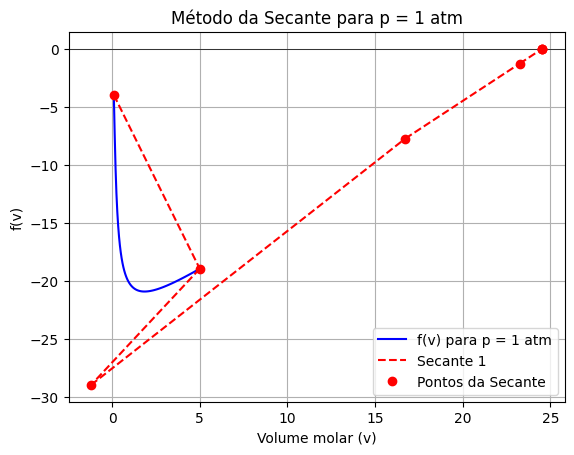

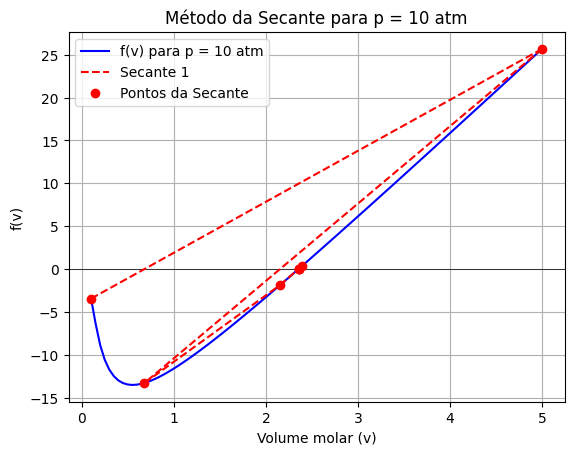

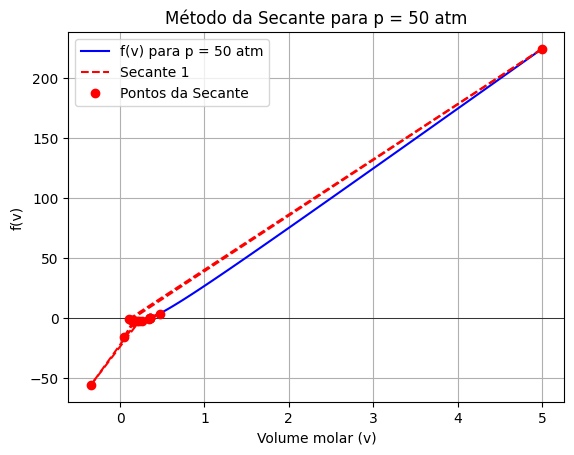

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de Van der Waals
a = 3.592
b = 0.04267
R = 0.082054
T = 300  # K

# Função de Van der Waals
def van_der_waals(v, p):
    return (p + a / v**2) * (v - b) - R * T

# Lista de pressões para as quais queremos calcular o volume molar
pressoes = [1, 10, 50]  # atm

# Função do método da secante com visualização
def secante_plot(func, x0, x1, p, epsilon=1e-6, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [func(x0, p), func(x1, p)]

    for _ in range(N_max):
        if abs(func(x1, p)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - func(x1, p) * (x1 - x0) / (func(x1, p) - func(x0, p))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(func(x2, p))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y

# Pontos iniciais e chamada da função secante para cada pressão
for p in pressoes:
    x0, x1 = 0.1, 5  # Escolha inicial para o intervalo de volume molar
    pontos_x, pontos_y = secante_plot(van_der_waals, x0, x1, p)

    # Preparação do gráfico
    x_vals = np.linspace(0.1, 5, 100)
    y_vals = [van_der_waals(x, p) for x in x_vals]

    # Plot da função de Van der Waals
    plt.plot(x_vals, y_vals, label=f"f(v) para p = {p} atm", color="blue")
    plt.axhline(0, color="black", linewidth=0.5)  # Linha y=0 para referência

    # Plot das secantes em cada iteração
    for i in range(1, len(pontos_x) - 1):
        x_sec = [pontos_x[i-1], pontos_x[i]]
        y_sec = [pontos_y[i-1], pontos_y[i]]
        plt.plot(x_sec, y_sec, "r--", label=f"Secante {i}" if i == 1 else "")

    # Marcações dos pontos de cada iteração
    plt.plot(pontos_x, pontos_y, 'ro', label="Pontos da Secante")

    # Personalização do gráfico
    plt.xlabel("Volume molar (v)")
    plt.ylabel("f(v)")
    plt.title(f"Método da Secante para p = {p} atm")
    plt.legend()
    plt.grid()
    plt.show()


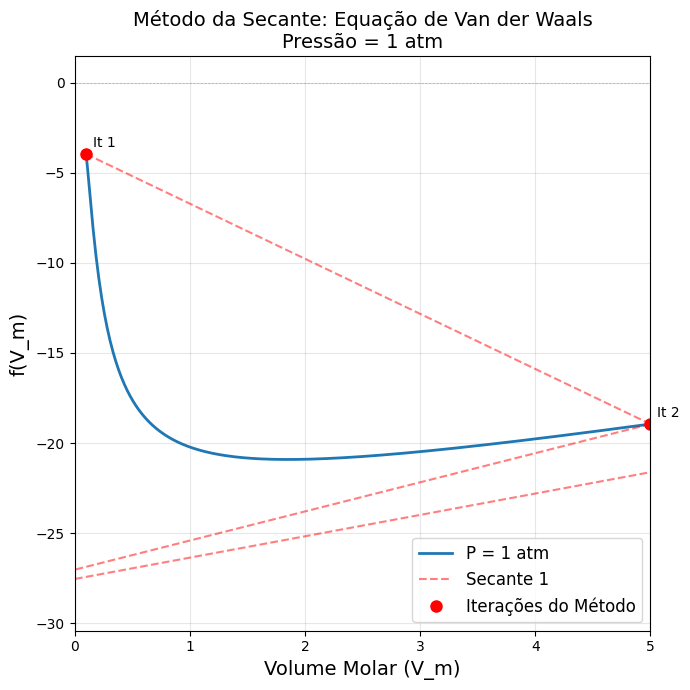


Para P = 1 atm:
Volume molar final = 24.5126
Número de iterações = 7


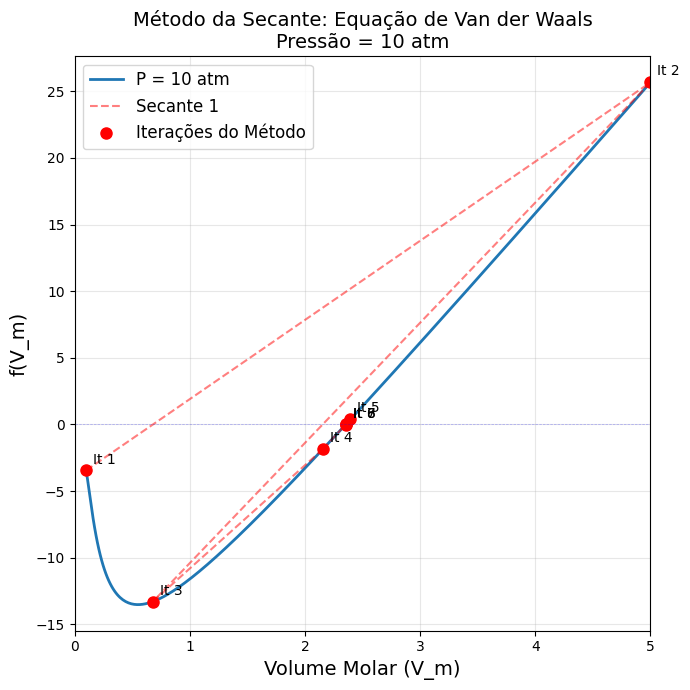


Para P = 10 atm:
Volume molar final = 2.3545
Número de iterações = 7


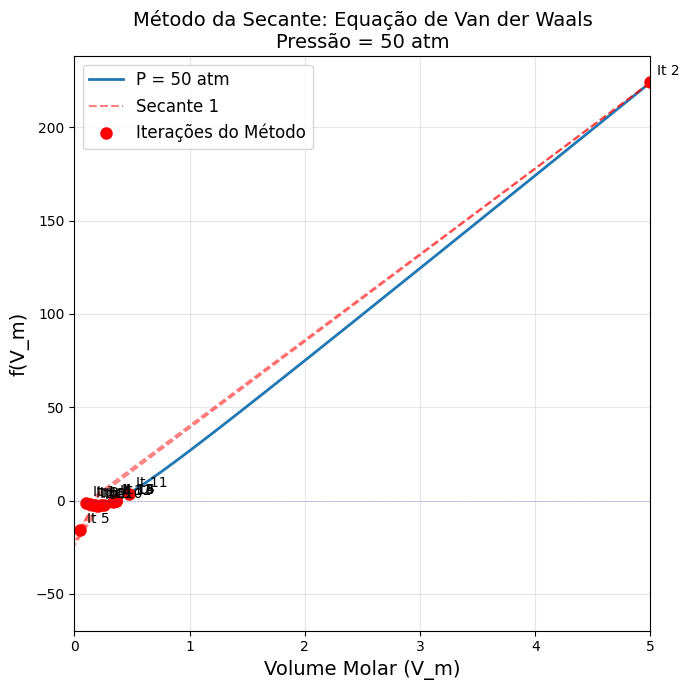


Para P = 50 atm:
Volume molar final = 0.3584
Número de iterações = 15


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de Van der Waals
a = 3.592
b = 0.04267
R = 0.082054
T = 300  # K

# Função de Van der Waals
def van_der_waals(v, p):
    return (p + a / v**2) * (v - b) - R * T

# Função do método da secante com visualização
def secante_plot(func, x0, x1, p, epsilon=1e-6, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [func(x0, p), func(x1, p)]

    for _ in range(N_max):
        if abs(func(x1, p)) < epsilon:
            break
        try:
            x2 = x1 - func(x1, p) * (x1 - x0) / (func(x1, p) - func(x0, p))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        pontos_x.append(x2)
        pontos_y.append(func(x2, p))

        if abs(x2 - x1) < epsilon:
            break

        x0, x1 = x1, x2

    return pontos_x, pontos_y

# Lista de pressões
pressoes = [1, 10, 50]  # atm

# Criação dos gráficos para cada pressão
for p in pressoes:
    # Configuração do tamanho da figura
    plt.figure(figsize=(7, 7))

    # Pontos iniciais
    x0, x1 = 0.1, 5
    pontos_x, pontos_y = secante_plot(van_der_waals, x0, x1, p)

    # Plot da função de Van der Waals
    x_vals = np.linspace(0.1, 5, 400)
    y_vals = [van_der_waals(x, p) for x in x_vals]
    plt.plot(x_vals, y_vals, label=f"P = {p} atm", linewidth=2)

    # Plot das secantes
    for i in range(1, len(pontos_x) - 1):
        x_sec = [pontos_x[i-1], pontos_x[i]]
        y_sec = [pontos_y[i-1], pontos_y[i]]
        plt.plot(x_sec, y_sec, "--", color='red', alpha=0.5,
                label=f"Secante {i}" if i == 1 else "")

    # Plot dos pontos
    plt.plot(pontos_x, pontos_y, 'o', color='red',
            label=f"Iterações do Método", markersize=8)

    # Adiciona anotações para os pontos
    for i, (x, y) in enumerate(zip(pontos_x, pontos_y)):
        plt.annotate(f'It {i+1}', (x, y),
                    xytext=(5, 5), textcoords='offset points')

    # Linha horizontal em y=0
    plt.axhline(0, color="blue", linewidth=0.5, alpha=0.3, linestyle='--')

    # Configurações do gráfico
    plt.xlabel('Volume Molar (V_m)', fontsize=14)
    plt.ylabel('f(V_m)', fontsize=14)
    plt.title(f'Método da Secante: Equação de Van der Waals\nPressão = {p} atm',
             fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)

    # Ajusta os limites do gráfico
    plt.xlim(0, 5)
    plt.tight_layout()

    # Mostra o gráfico
    plt.show()

    # Imprime o resultado final
    print(f"\nPara P = {p} atm:")
    print(f"Volume molar final = {pontos_x[-1]:.4f}")
    print(f"Número de iterações = {len(pontos_x)-1}")

item b

Valor da raiz para P=1 é: 24.5126
Valor da raiz para P=10 é: 2.3545
Valor da raiz para P=50 é: 0.3584


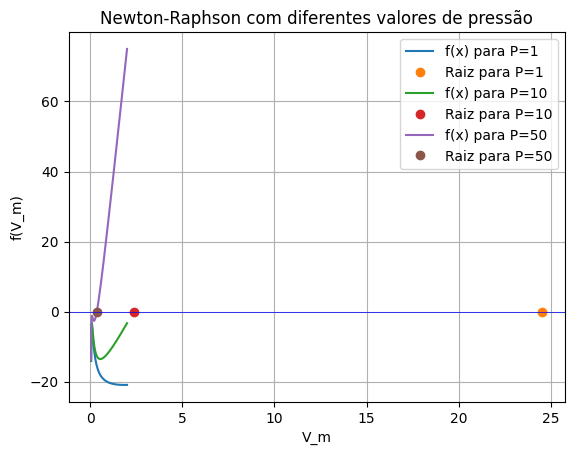

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
a = 3.592
b = 0.04267
R = 0.082054
T = 300

# Função de Van der Waals
def van_der_waals(v, P):
    return (P + a / v**2) * (v - b) - R * T

# Derivada da função de Van der Waals em relação a V_m
def derivadafunc(V_m, P):
    termo1 = P
    termo2 = -a / V_m**2
    termo3 = (2 * a * b) / V_m**3
    derivada = termo1 + termo2 + termo3
    return derivada

# Função para calcular a reta tangente
def reta_tangente(x, x0, P):
    return van_der_waals(x0, P) + derivadafunc(x0, P) * (x - x0)

# Método de Newton-Raphson com plotagem das tangentes
def newtonraphson(x0, P):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001

    for i in range(max_iteracoes):
        derivada = derivadafunc(x, P)

        # Verifica se a derivada é zero
        if abs(derivada) < 1e-6:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        h = van_der_waals(x, P) / derivada
        x = x - h  # Atualiza x

        # Verifica se a mudança é menor que a tolerância
        if abs(h) < tolerancia:
            break

    return x  # Retorna a raiz encontrada

# Valores iniciais e lista de pressões
x0 = 1  # Ponto inicial
pressao_lista = [1, 10, 50]

# Plot e execução do método para cada valor de pressão
for P in pressao_lista:
    # Plot da função principal
    xvalores = np.linspace(0.05, 2, 400)  # Ajuste o intervalo conforme necessário
    yvalores = [van_der_waals(v, P) for v in xvalores]
    plt.plot(xvalores, yvalores, label=f"f(x) para P={P}")

    # Calcula a raiz com o método de Newton-Raphson
    try:
        raiz = newtonraphson(x0, P)
        print(f"Valor da raiz para P={P} é: {raiz:.4f}")

        # Marca a raiz no gráfico
        plt.plot(raiz, van_der_waals(raiz, P), 'o', label=f"Raiz para P={P}")

    except ValueError as e:
        print(f"Erro para P={P}: {e}")

# Configurações do gráfico
plt.axhline(0, color="blue", linewidth=0.5)
plt.legend()
plt.xlabel("V_m")
plt.ylabel("f(V_m)")
plt.title("Newton-Raphson com diferentes valores de pressão")
plt.grid(True)
plt.show()


Valor da raiz para P=1 é: 24.5126
Valor da raiz para P=10 é: 2.3545
Valor da raiz para P=50 é: 0.3584


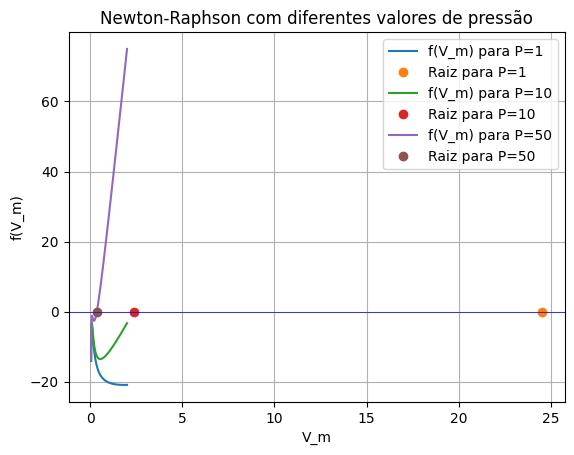

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
a = 3.592
b = 0.04267
R = 0.082054
T = 300

# Função de Van der Waals
def van_der_waals(v, P):
    return (P + a / v**2) * (v - b) - R * T

# Derivada da função de Van der Waals em relação a V_m
def derivadafunc(V_m, P):
    termo1 = P
    termo2 = -a / V_m**2
    termo3 = (2 * a * b) / V_m**3
    derivada = termo1 + termo2 + termo3
    return derivada

# Função para calcular a reta tangente
def reta_tangente(x, x0, P):
    return van_der_waals(x0, P) + derivadafunc(x0, P) * (x - x0)

# Método de Newton-Raphson com plotagem das tangentes
def newtonraphson(x0, P):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001

    for i in range(max_iteracoes):
        derivada = derivadafunc(x, P)

        # Verifica se a derivada é zero
        if abs(derivada) < 5*1e-6:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        h = van_der_waals(x, P) / derivada
        x = x - h  # Atualiza x

        # Verifica se a mudança é menor que a tolerância
        if abs(h) < tolerancia:
            break

    return x  # Retorna a raiz encontrada

# Valores iniciais e lista de pressões
x0 = 1  # Ponto inicial
pressao_lista = [1, 10, 50]

# Plot e execução do método para cada valor de pressão
for P in pressao_lista:
    # Plot da função principal
    xvalores = np.linspace(0.05, 2, 400)  # Ajuste o intervalo conforme necessário
    yvalores = [van_der_waals(v, P) for v in xvalores]
    plt.plot(xvalores, yvalores, label=f"f(V_m) para P={P}")

    # Calcula a raiz com o método de Newton-Raphson
    try:
        raiz = newtonraphson(x0, P)
        print(f"Valor da raiz para P={P} é: {raiz:.4f}")

        # Marca a raiz no gráfico
        plt.plot(raiz, van_der_waals(raiz, P), 'o', label=f"Raiz para P={P}")

    except ValueError as e:
        print(f"Erro para P={P}: {e}")

# Configurações do gráfico
plt.axhline(0, color="blue", linewidth=0.5)
plt.legend()
plt.xlabel("V_m")
plt.ylabel("f(V_m)")
plt.title("Newton-Raphson com diferentes valores de pressão")
plt.grid(True)
plt.show()


Valor da raiz para P=1 é: 24.5126
Valor da raiz para P=10 é: 2.3545
Valor da raiz para P=50 é: 0.3584


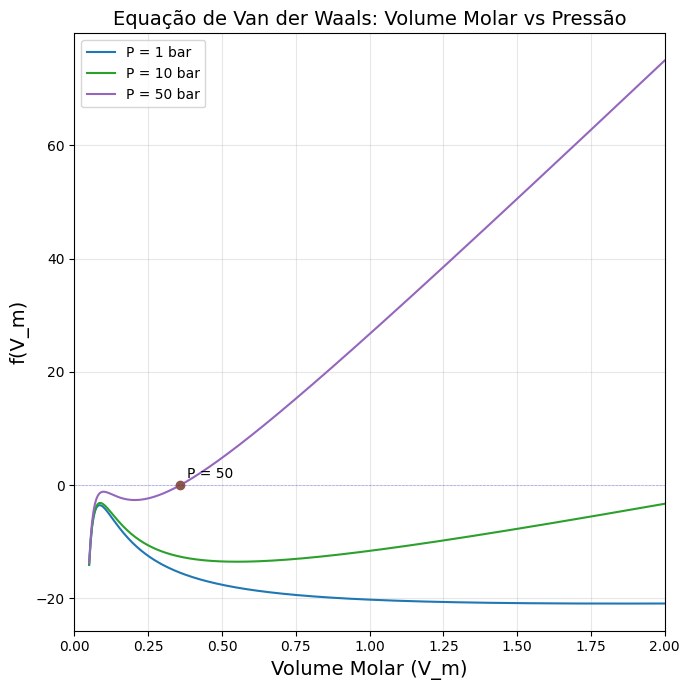

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
a = 3.592
b = 0.04267
R = 0.082054
T = 300

# Função de Van der Waals
def van_der_waals(v, P):
    return (P + a/v**2) * (v - b) - R*T

# Derivada da função de Van der Waals em relação a V_m
def derivadafunc(V_m, P):
    termo1 = P
    termo2 = -a/V_m**2
    termo3 = (2*a*b)/V_m**3
    derivada = termo1 + termo2 + termo3
    return derivada

# Método de Newton-Raphson
def newtonraphson(x0, P):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    for i in range(max_iteracoes):
        derivada = derivadafunc(x, P)
        if abs(derivada) < 5*10e-6:
            raise ValueError("A derivada é zero. O método não pode continuar.")
        h = van_der_waals(x, P)/derivada
        x = x - h
        if abs(h) < tolerancia:
            break
    return x

# Configuração do tamanho da figura
plt.figure(figsize=(7, 7))

# Valores iniciais e lista de pressões
x0 = 1
pressao_lista = [1, 10, 50]

# Plot e execução do método para cada valor de pressão
for P in pressao_lista:
    # Plot da função principal
    xvalores = np.linspace(0.05, 2, 400)
    yvalores = [van_der_waals(v, P) for v in xvalores]
    plt.plot(xvalores, yvalores, label=f"P = {P} bar")

    try:
        # Calcula a raiz
        raiz = newtonraphson(x0, P)
        valor_y = van_der_waals(raiz, P)

        # Plot do ponto com marcador
        plt.plot(raiz, valor_y, 'o')

        # Adiciona anotação próxima ao ponto
        plt.annotate(f'P = {P}', (raiz, valor_y),
                    xytext=(5, 5), textcoords='offset points')

        print(f"Valor da raiz para P={P} é: {raiz:.4f}")

    except ValueError as e:
        print(f"Erro para P={P}: {e}")

# Adiciona linha horizontal em y=0
plt.axhline(0, color="blue", linewidth=0.5, alpha=0.3, linestyle='--')

# Configurações do gráfico
plt.legend()
plt.xlabel('Volume Molar (V_m)', fontsize=14)
plt.ylabel('f(V_m)', fontsize=14)
plt.title('Equação de Van der Waals: Volume Molar vs Pressão', fontsize=14)
plt.grid(True, alpha=0.3)

# Ajusta os limites do gráfico para melhor visualização
plt.xlim(0, 2)
plt.tight_layout()

plt.show()

tanto o algoritimo da secante quanto o algoritimo de neton-rasphson, deram os mesmos valores sendo que geram graficos que são opostos isso se deve pelo forma difrente que ambos os algoritimos usam para chegar nas aproximações logo, quero provar isso com

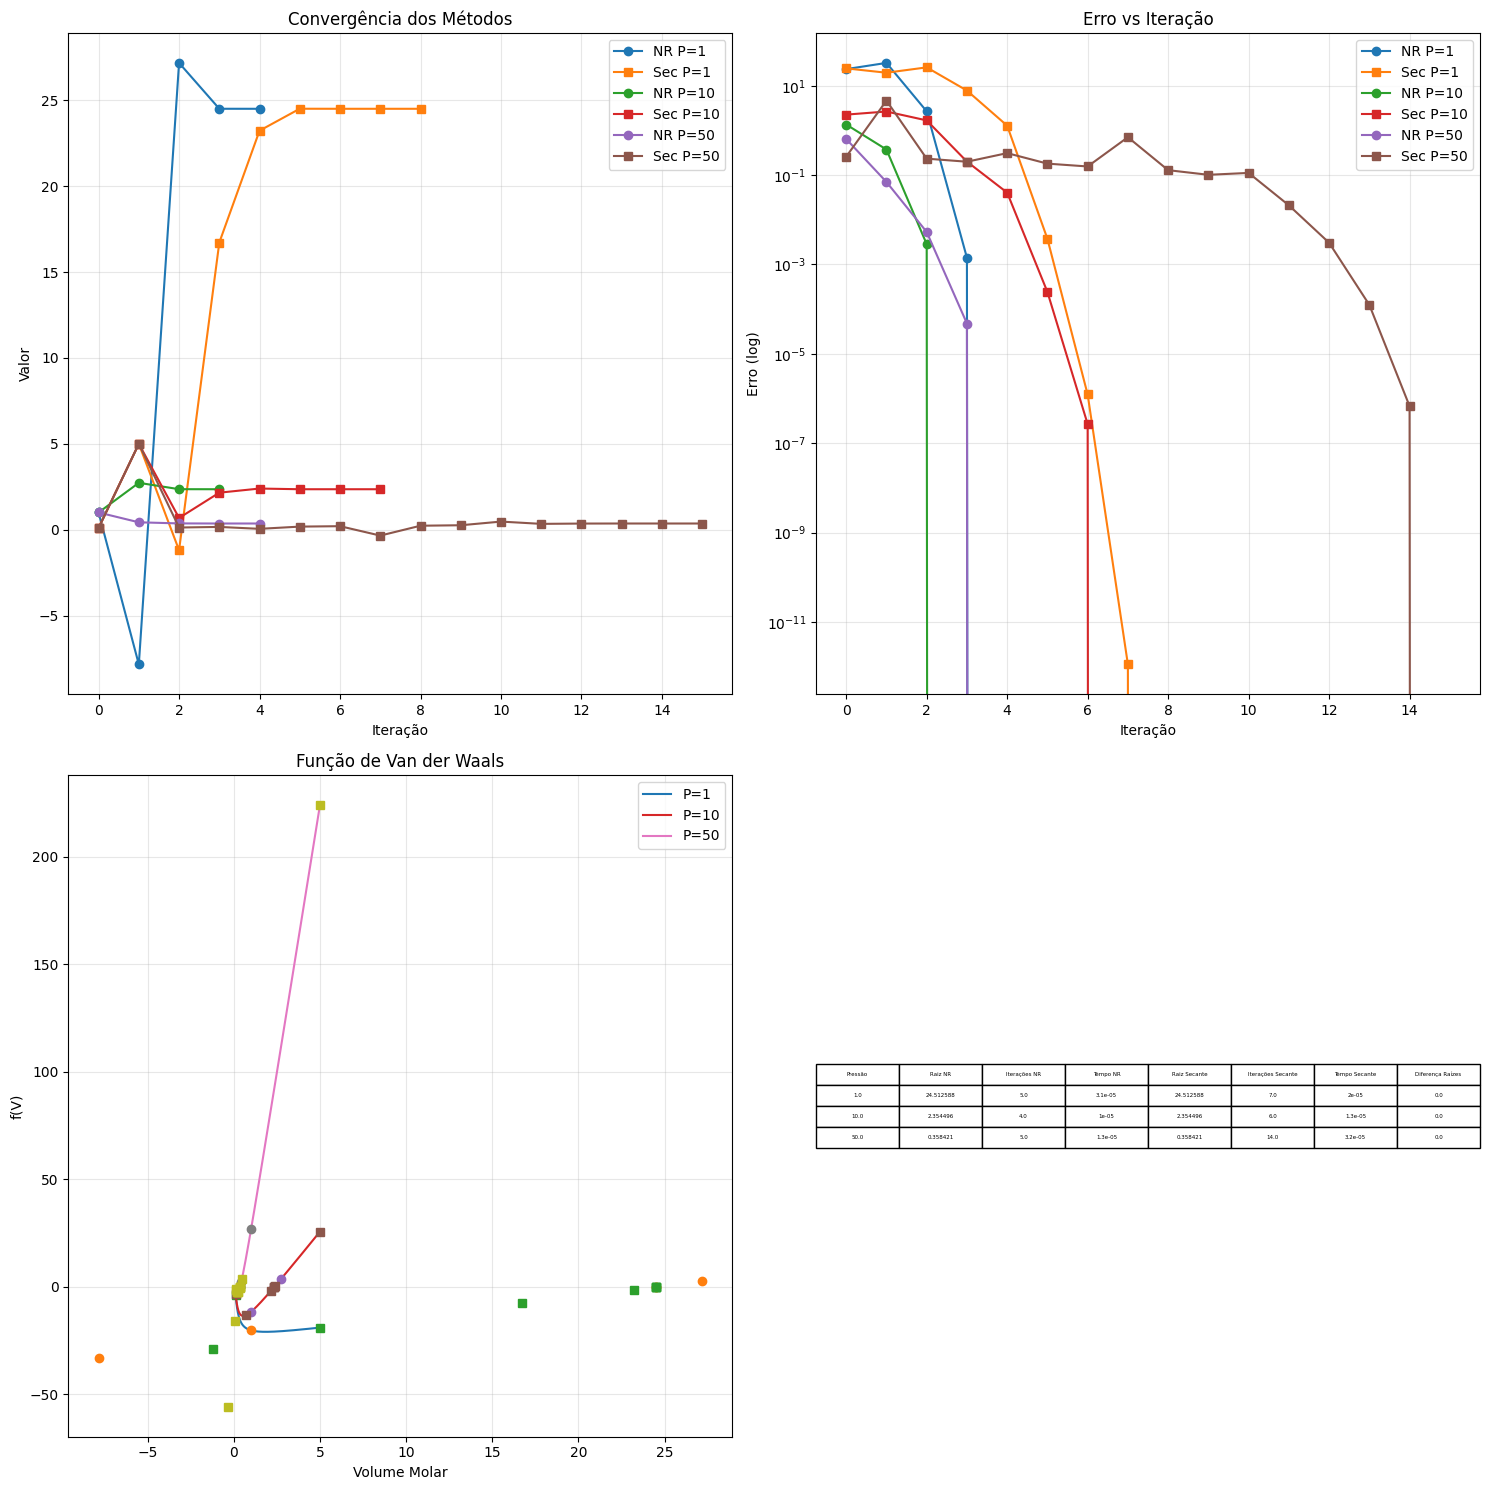


Resultados detalhados:
   Pressão    Raiz NR  Iterações NR  Tempo NR  Raiz Secante  \
0        1  24.512588             5  0.000031     24.512588   
1       10   2.354496             4  0.000010      2.354496   
2       50   0.358421             5  0.000013      0.358421   

   Iterações Secante  Tempo Secante  Diferença Raízes  
0                  7       0.000020      3.552714e-15  
1                  6       0.000013      1.810996e-12  
2                 14       0.000032      1.475893e-10  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Tuple, List
import pandas as pd

# Constantes
a = 3.592
b = 0.04267
R = 0.082054
T = 300

class MetodosNumericos:
    def __init__(self, epsilon=1e-6, max_iter=100):
        self.epsilon = epsilon
        self.max_iter = max_iter

    def van_der_waals(self, v: float, p: float) -> float:
        """Função de Van der Waals"""
        return (p + a/v**2) * (v - b) - R*T

    def derivada_van_der_waals(self, v: float, p: float) -> float:
        """Derivada da função de Van der Waals"""
        termo1 = p
        termo2 = -a/v**2
        termo3 = (2*a*b)/v**3
        return termo1 + termo2 + termo3

    def newton_raphson(self, p: float, x0: float = 1.0) -> Tuple[float, int, List[float]]:
        """Método de Newton-Raphson"""
        x = x0
        iteracoes = []

        for i in range(self.max_iter):
            iteracoes.append(x)
            derivada = self.derivada_van_der_waals(x, p)

            if abs(derivada) < 1e-10:
                raise ValueError("Derivada próxima de zero")

            h = self.van_der_waals(x, p)/derivada
            x_novo = x - h

            if abs(h) < self.epsilon:
                return x_novo, i+1, iteracoes

            x = x_novo

        return x, self.max_iter, iteracoes

    def secante(self, p: float, x0: float = 0.1, x1: float = 5.0) -> Tuple[float, int, List[float]]:
        """Método da Secante"""
        iteracoes = [x0, x1]

        for i in range(self.max_iter):
            f_x1 = self.van_der_waals(x1, p)
            f_x0 = self.van_der_waals(x0, p)

            if abs(f_x1 - f_x0) < 1e-10:
                raise ValueError("Divisão por zero")

            x2 = x1 - f_x1 * (x1 - x0)/(f_x1 - f_x0)
            iteracoes.append(x2)

            if abs(x2 - x1) < self.epsilon:
                return x2, i+1, iteracoes

            x0, x1 = x1, x2

        return x1, self.max_iter, iteracoes

def comparar_metodos(pressoes: List[float]) -> pd.DataFrame:
    """Compara os métodos para diferentes pressões"""
    metodos = MetodosNumericos()
    resultados = []

    for p in pressoes:
        # Newton-Raphson
        inicio = time.perf_counter()
        raiz_nr, iter_nr, _ = metodos.newton_raphson(p)
        tempo_nr = time.perf_counter() - inicio

        # Secante
        inicio = time.perf_counter()
        raiz_sec, iter_sec, _ = metodos.secante(p)
        tempo_sec = time.perf_counter() - inicio

        resultados.append({
            'Pressão': p,
            'Raiz NR': raiz_nr,
            'Iterações NR': iter_nr,
            'Tempo NR': tempo_nr,
            'Raiz Secante': raiz_sec,
            'Iterações Secante': iter_sec,
            'Tempo Secante': tempo_sec,
            'Diferença Raízes': abs(raiz_nr - raiz_sec)
        })

    return pd.DataFrame(resultados)

def plotar_comparacao(pressoes: List[float]):
    """Gera gráficos comparativos"""
    metodos = MetodosNumericos()

    # Configuração dos subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

    for p in pressoes:
        # Obter dados das iterações
        _, _, iter_nr = metodos.newton_raphson(p)
        _, _, iter_sec = metodos.secante(p)

        # Plot da convergência
        ax1.plot(range(len(iter_nr)), iter_nr, 'o-', label=f'NR P={p}')
        ax1.plot(range(len(iter_sec)), iter_sec, 's-', label=f'Sec P={p}')

        # Plot do erro
        erro_nr = [abs(x - iter_nr[-1]) for x in iter_nr]
        erro_sec = [abs(x - iter_sec[-1]) for x in iter_sec]

        ax2.semilogy(range(len(erro_nr)), erro_nr, 'o-', label=f'NR P={p}')
        ax2.semilogy(range(len(erro_sec)), erro_sec, 's-', label=f'Sec P={p}')

        # Plot da função e pontos
        x = np.linspace(0.1, 5, 1000)
        y = [metodos.van_der_waals(v, p) for v in x]
        ax3.plot(x, y, label=f'P={p}')
        ax3.plot(iter_nr, [metodos.van_der_waals(x, p) for x in iter_nr], 'o')
        ax3.plot(iter_sec, [metodos.van_der_waals(x, p) for x in iter_sec], 's')

    # Configurações dos gráficos
    ax1.set_title('Convergência dos Métodos')
    ax1.set_xlabel('Iteração')
    ax1.set_ylabel('Valor')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    ax2.set_title('Erro vs Iteração')
    ax2.set_xlabel('Iteração')
    ax2.set_ylabel('Erro (log)')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    ax3.set_title('Função de Van der Waals')
    ax3.set_xlabel('Volume Molar')
    ax3.set_ylabel('f(V)')
    ax3.grid(True, alpha=0.3)
    ax3.legend()

    # Resultados numéricos no quarto subplot
    df = comparar_metodos(pressoes)
    ax4.axis('off')
    ax4.table(cellText=df.values.round(6),
              colLabels=df.columns,
              loc='center',
              cellLoc='center')

    plt.tight_layout()
    plt.show()

    return df

# Exemplo de uso
pressoes = [1, 10, 50]
resultados = plotar_comparacao(pressoes)
print("\nResultados detalhados:")
print(resultados)

nessa função como podemos ver que o metodo da secante tem um tempo de execução maior e ainda faz menos interações mas no caso pegamos uma função complicada e não proxima da raiz, caso fosse feito isso o metodo de newton-rasphson se sairia mais performatico, ou seja em casos especificos o melhor metodo seria o de newton mas em casos gerais o metodo da secante tem uma performace melhor, ambos formos textados com a tolegrancia de $5\cdot10^{-6}$,

# questão 3

item a

Valor da raiz é: 3.1415


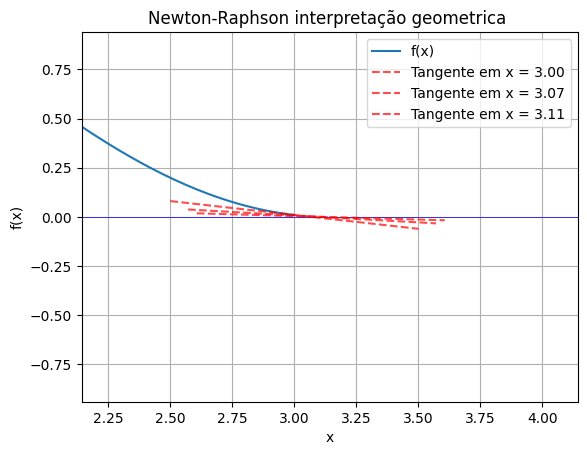

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.cos(x)+1

def derivadafunc(x):
    return -np.sin(x)

# Função para desenhar a reta tangente no ponto (x, y)
def reta_tangente(x, x0):
    return f(x0) + derivadafunc(x0) * (x - x0)

# Plot da função principal
xvalores = np.linspace(-3, 3, 400)
yvalores = f(xvalores)
plt.axhline(0, color="blue", linewidth=0.5)
plt.plot(xvalores, yvalores, label="f(x)")

# Método de Newton-Raphson com apenas três retas tangentes
def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    pontos_tangentes = []

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)
        if abs(derivada) < 1e-15:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        # Adiciona o ponto atual à lista de pontos onde a reta tangente será desenhada
        if len(pontos_tangentes) < 3:
            pontos_tangentes.append(x)

        h = f(x) / derivada
        x = x - h  # Atualiza x

        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz, pontos_tangentes

# Executa o método e encontra a raiz
x0 = 3  # Ponto inicial
raiz, pontos_tangentes = newtonraphson(x0)
print(f"Valor da raiz é: {raiz:.4f}")

# Desenha apenas três retas tangentes nos pontos especificados
for p in pontos_tangentes:
    x_tangente = np.linspace(p - 0.5, p + 0.5, 100)
    y_tangente = reta_tangente(x_tangente, p)
    plt.plot(x_tangente, y_tangente, linestyle="--", color="red", alpha=0.7, label=f"Tangente em x = {p:.2f}")

# Ajusta os limites dos eixos para fazer zoom na área de convergência
plt.xlim(raiz - 1, raiz + 1)
plt.ylim(-0.94, 0.94)

plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson interpretação geometrica ")
plt.grid(True)
plt.show()


item b


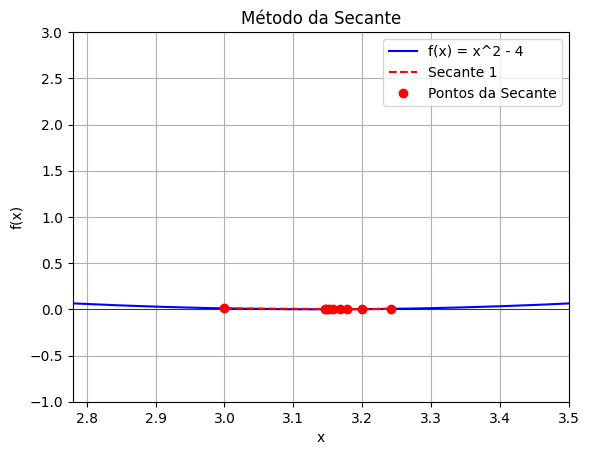

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define a função para a qual queremos encontrar a raiz
def f(x):
    return np.cos(x)+1

# Implementa o método da secante e armazena os pontos intermediários para plotar
def secante_plot(f, x0, x1, epsilon=1e-5, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [f(x0), f(x1)]

    for _ in range(N_max):
        if abs(f(x1)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(f(x2))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y

# Pontos iniciais e chamada da função secante
x0, x1 = 3, 3.2  # Escolha inicial para encontrar a raiz em torno de x = 2
pontos_x, pontos_y = secante_plot(f, x0, x1)

# Preparação do gráfico
x_vals = np.linspace(-2, 4, 100)  # Intervalo para o eixo x
y_vals = f(x_vals)

# Plot da função
plt.plot(x_vals, y_vals, label="f(x) = x^2 - 4", color="blue")
plt.axhline(0, color="black", linewidth=0.5)  # Linha y=0 para referência

# Plot das secantes em cada iteração
for i in range(1, len(pontos_x) - 1):
    x_sec = [pontos_x[i-1], pontos_x[i]]
    y_sec = [pontos_y[i-1], pontos_y[i]]
    plt.plot(x_sec, y_sec, "r--", label=f"Secante {i}" if i == 1 else "")

# Marcações dos pontos de cada iteração
plt.plot(pontos_x, pontos_y, 'ro', label="Pontos da Secante")

#zoom no grafico para a parte da raiz

plt.xlim(2.78,3.5)
plt.ylim(-1,3)


# Personalização do gráfico
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Método da Secante")
plt.legend()
plt.grid()
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define a função para a qual queremos encontrar a raiz
def f(x):
    return np.cos(x)+1

def derivadafunc(x):
    return -np.sin(x)


def newtonraphson(x0):
    x = x0
    max_iteracoes = 1000
    tolerancia = 0.0001
    pontos_tangentes = []

    for i in range(max_iteracoes):
        derivada = derivadafunc(x)
        if abs(derivada) < 1e-15:
            raise ValueError("A derivada é zero. O método não pode continuar.")

        # Adiciona o ponto atual à lista de pontos onde a reta tangente será desenhada
        if len(pontos_tangentes) < 3:
            pontos_tangentes.append(x)

        h = f(x) / derivada
        x = x - h  # Atualiza x

        if abs(h) < tolerancia:
            break

    raiz = x
    return raiz, pontos_tangentes

# Executa o método e encontra a raiz
x0 = 3  # Ponto inicial
raiz, pontos_tangentes = newtonraphson(x0)
print(f"Valor da raiz é: {raiz:.4f}")

def secante_plot(f, x0, x1, epsilon=1e-5, N_max=100):
    pontos_x = [x0, x1]
    pontos_y = [f(x0), f(x1)]

    for _ in range(N_max):
        if abs(f(x1)) < epsilon:
            break
        try:
            # Cálculo do próximo ponto pelo método da secante
            x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        except ZeroDivisionError:
            print("Erro: Divisão por zero detectada.")
            break

        # Armazena os pontos para plotar a secante
        pontos_x.append(x2)
        pontos_y.append(f(x2))

        # Verifica a condição de parada
        if abs(x2 - x1) < epsilon:
            break

        # Atualiza os pontos
        x0, x1 = x1, x2

    return pontos_x, pontos_y





Valor da raiz é: 3.1415


item c

comparação de dados na equação .....

In [30]:
# Execução dos métodos e armazenamento dos dados
x0_secante, x1_secante = 3, 3.2  # Ponto inicial para secante
num_iter_secante, valor_secante = secante_plot(f, x0_secante, x1_secante)

x0_newton = 3  # Ponto inicial para Newton-Raphson
num_iter_newton, valor_newton = newtonraphson(x0_newton)

# Criação da tabela de comparação usando pandas
dados = {
    'Método': ['Secante', 'Newton-Raphson'],
    'Número de Interações': [num_iter_secante, num_iter_newton],
    'Valor da Raiz': [valor_secante, valor_newton]
}
tabela = pd.DataFrame(dados)

# Exibição da tabela
print(tabela)

           Método                               Número de Interações  \
0         Secante  [3, 3.2, 3.2410784596696303, 3.178376303072892...   
1  Newton-Raphson                                           3.141524   

                                       Valor da Raiz  
0  [0.010007503399554585, 0.0017052242052468802, ...  
1          [3, 3.070914844302653, 3.106268467156334]  


In [32]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

def format_table_comparison(f, df_secante, df_newton):
    """
    Formata e estiliza a tabela de comparação dos métodos numéricos
    """

    pd.set_option('display.precision', 8)
    pd.set_option('display.float_format', lambda x: '%.8f' % x)


    comparison_data = {
        'Método': ['Secante', 'Newton-Raphson'],
        'Iterações': [len(df_secante), len(df_newton)],
        'Valor Final': [df_secante['x'].iloc[-1], df_newton['x'].iloc[-1]],
        'Erro Final': [df_secante['erro'].iloc[-1], df_newton['erro'].iloc[-1]],
        'Tempo (ms)': [df_secante['tempo'].iloc[-1], df_newton['tempo'].iloc[-1]]
    }

    comparison_df = pd.DataFrame(comparison_data)

    # Aplicando estilo à tabela
    styled_df = comparison_df.style\
        .format({
            'Valor Final': '{:.8f}',
            'Erro Final': '{:.2e}',
            'Tempo (ms)': '{:.3f}'
        })\
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid black',
            'padding': '8px'
        })\
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', '#f2f2f2'),
                      ('text-align', 'center'),
                      ('font-weight', 'bold'),
                      ('border', '1px solid black'),
                      ('padding', '8px')]},
        ])

    return styled_df

def create_iteration_table(df, method_name):
    """
    Cria uma tabela detalhada para cada iteração do método
    """
    styled_df = df.style\
        .format({
            'x': '{:.8f}',
            'f(x)': '{:.2e}',
            'erro': '{:.2e}',
            'tempo': '{:.3f}'
        })\
        .set_caption(f'Detalhamento das Iterações - Método {method_name}')\
        .set_properties(**{
            'text-align': 'center',
            'border': '1px solid black',
            'padding': '5px'
        })\
        .set_table_styles([
            {'selector': 'th',
             'props': [('background-color', '#f2f2f2'),
                      ('text-align', 'center'),
                      ('font-weight', 'bold'),
                      ('border', '1px solid black'),
                      ('padding', '5px')]},
            {'selector': 'caption',
             'props': [('caption-side', 'top'),
                      ('font-weight', 'bold'),
                      ('font-size', '14px'),
                      ('padding', '8px')]}
        ])

    return styled_df


def secante_plot(f, x0, x1, tol=1e-8, max_iter=100):
    """
    Implementação do método da secante com registro de dados para plotagem
    """
    import time

    data = []
    start_time = time.time()

    x_ant = x0
    x_atual = x1

    for i in range(max_iter):
        f_x_ant = f(x_ant)
        f_x_atual = f(x_atual)

        if abs(f_x_atual) < tol:
            break

        x_novo = x_atual - f_x_atual * (x_atual - x_ant) / (f_x_atual - f_x_ant)
        erro = abs(x_novo - x_atual)

        current_time = (time.time() - start_time) * 1000  # tempo em millisegundos

        data.append({
            'iteracao': i,
            'x': x_novo,
            'f(x)': f_x_atual,
            'erro': erro,
            'tempo': current_time
        })

        x_ant = x_atual
        x_atual = x_novo

    return pd.DataFrame(data)

def newtonraphson(f, df, x0, tol=1e-8, max_iter=100):
    """
    Implementação do método de Newton-Raphson com registro de dados para plotagem
    """
    import time

    data = []
    start_time = time.time()

    x = x0

    for i in range(max_iter):
        f_x = f(x)
        df_x = df(x)

        if abs(f_x) < tol:
            break

        x_novo = x - f_x/df_x
        erro = abs(x_novo - x)

        current_time = (time.time() - start_time) * 1000  # tempo em millisegundos

        data.append({
            'iteracao': i,
            'x': x_novo,
            'f(x)': f_x,
            'erro': erro,
            'tempo': current_time
        })

        x = x_novo

    return pd.DataFrame(data)

# Exemplo de função para teste
def f(x):
    return np.cos(x)+1

def df(x):
    return -np.sin(x)

# Execução dos métodos
x0_secante, x1_secante = 3, 3.2
df_secante = secante_plot(f, x0_secante, x1_secante)

x0_newton = 3
df_newton = newtonraphson(f, df, x0_newton)

# Criação das tabelas
comparison_table = format_table_comparison(f, df_secante, df_newton)
secante_details = create_iteration_table(df_secante, "Secante")
newton_details = create_iteration_table(df_newton, "Newton-Raphson")

# Exibição das tabelas
display(HTML("<h3>Comparação dos Métodos</h3>"))
display(comparison_table)
display(HTML("<br><h3>Detalhamento das Iterações</h3>"))
display(secante_details)
display(newton_details)

,Método,Iterações,Valor Final,Erro Final,Tempo (ms)
0,Secante,14,3.14172112,7.94e-05,0.151
1,Newton-Raphson,10,3.14145469,1.38e-04,0.060


,iteracao,x,f(x),erro,tempo
0,0,3.24107846,1.71e-03,4.11e-02,0.101
1,1,3.17837630,4.94e-03,6.27e-02,0.110
2,2,3.16843898,6.76e-04,9.94e-03,0.114
3,3,3.15711088,3.60e-04,1.13e-02,0.118
4,4,3.15142618,1.20e-04,5.68e-03,0.121
5,5,3.14761184,4.83e-05,3.81e-03,0.124
6,6,3.14532637,1.81e-05,2.29e-03,0.127
7,7,3.14389698,6.97e-06,1.43e-03,0.130
8,8,3.14301757,2.65e-06,8.79e-04,0.134
9,9,3.14247312,1.02e-06,5.44e-04,0.138


,iteracao,x,f(x),erro,tempo
0,0,3.07091484,1.00e-02,7.09e-02,0.026
1,1,3.10626847,2.50e-03,3.54e-02,0.034
2,2,3.12393240,6.24e-04,1.77e-02,0.039
3,3,3.13276275,1.56e-04,8.83e-03,0.042
4,4,3.13717773,3.90e-05,4.41e-03,0.046
5,5,3.13938520,9.75e-06,2.21e-03,0.048
6,6,3.14048893,2.44e-06,1.10e-03,0.051
7,7,3.14104079,6.09e-07,5.52e-04,0.054
8,8,3.14131672,1.52e-07,2.76e-04,0.057
9,9,3.14145469,3.81e-08,1.38e-04,0.060


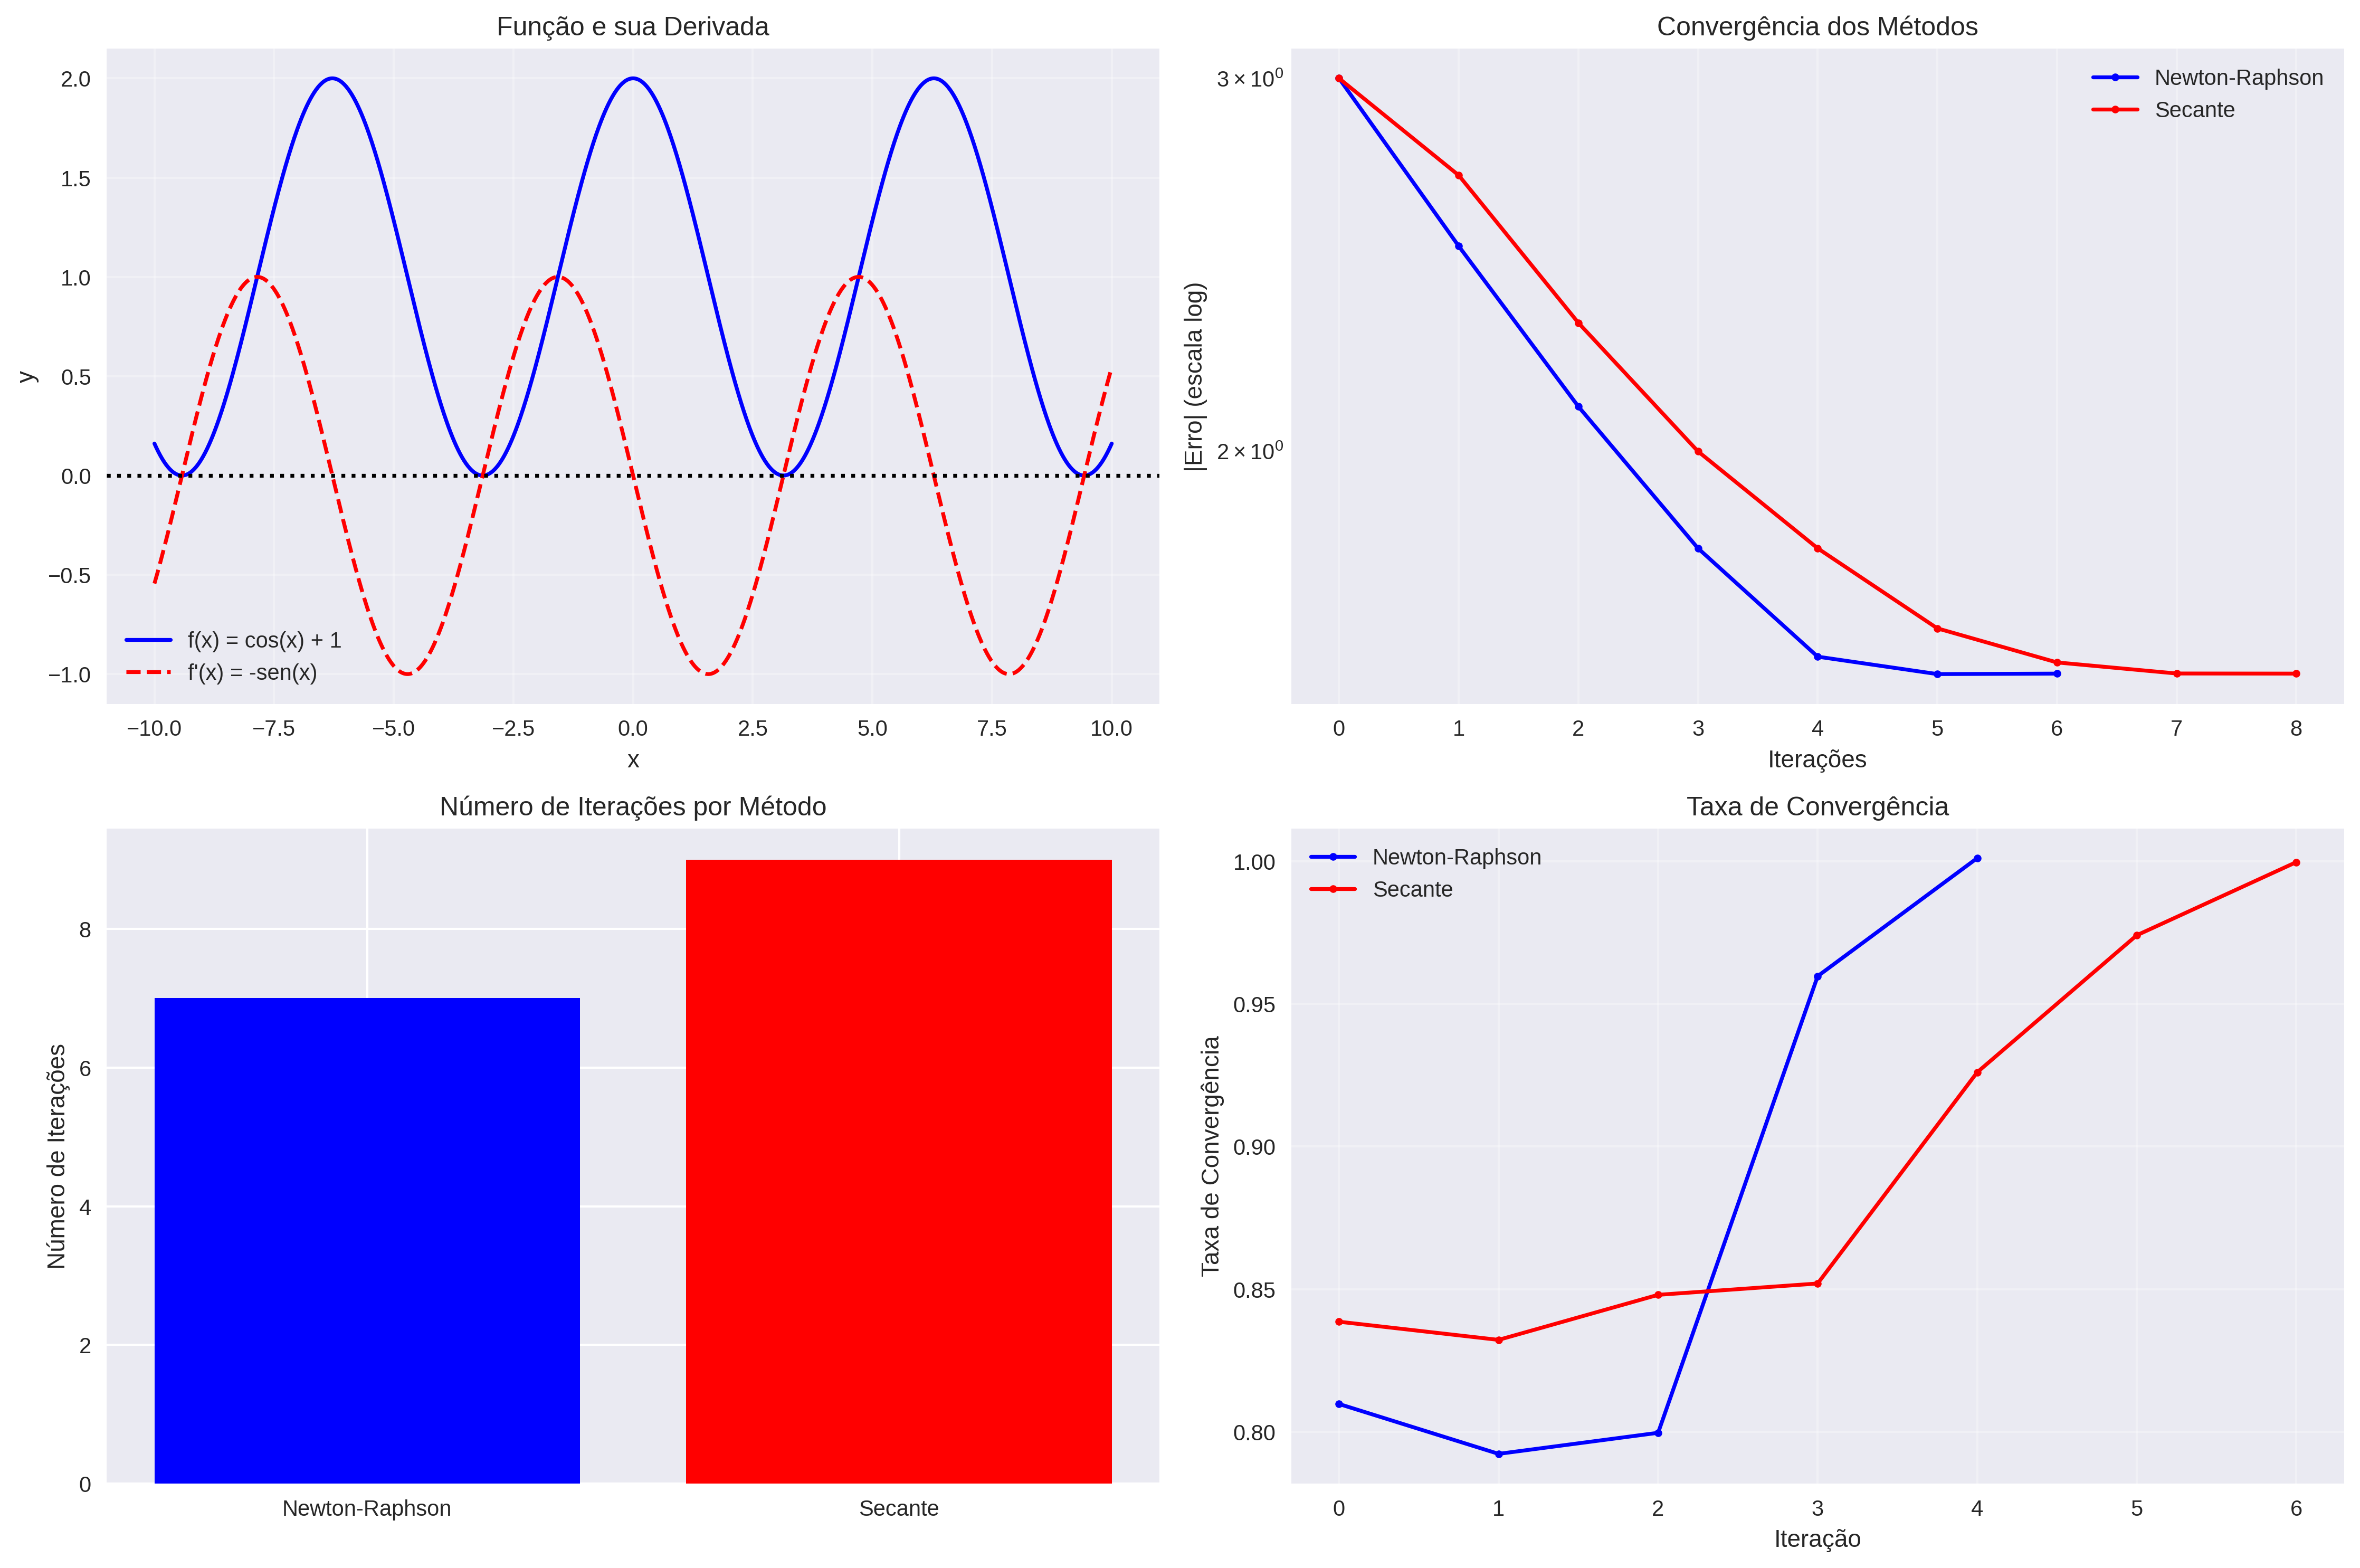

uma analise que eu quero acentuar esta sendo a melhor performace visto que como no caso anterior so que temos uma melhor performace no metodo de newton pois temos uma eq que esta proxima a raiz e sua derivada e simples para o calculo ou seja a eficiencia computacional para o calculo da derivada, com esse comportamente dessa função trigonometrica simples temos um menor numero de interações, melhor controle de erro e uma melhor convergencia para achar a raiz.

cria um arquivo png para a comparação dos algoritimos

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

def plot_comprehensive_analysis(f, df, x_newton, x_secante, title="Análise de Convergência"):
    """
    Cria uma visualização completa com múltiplos subplots para análise dos métodos numéricos
    """
    # Configuração do estilo
    plt.style.use('seaborn')
    sns.set_palette("husl")

    # Criar figura com GridSpec para layout personalizado
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2)

    # 1. Gráfico da função e sua derivada
    ax1 = fig.add_subplot(gs[0, 0])
    x = np.linspace(-10, 10, 1000)
    y_f = f(x)
    y_df = df(x)

    ax1.plot(x, y_f, 'b-', label='f(x) = cos(x) + 1')
    ax1.plot(x, y_df, 'r--', label="f'(x) = -sen(x)")
    ax1.axhline(y=0, color='k', linestyle=':')
    ax1.grid(True, alpha=0.3)
    ax1.set_title('Função e sua Derivada')
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    # 2. Gráfico de convergência (erro vs iterações)
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.semilogy(range(len(x_newton)), np.abs(x_newton), 'b.-', label='Newton-Raphson')
    ax2.semilogy(range(len(x_secante)), np.abs(x_secante), 'r.-', label='Secante')
    ax2.grid(True, alpha=0.3)
    ax2.set_title('Convergência dos Métodos')
    ax2.set_xlabel('Iterações')
    ax2.set_ylabel('|Erro| (escala log)')
    ax2.legend()

    # 3. Gráfico de barras comparando número de iterações
    ax3 = fig.add_subplot(gs[1, 0])
    methods = ['Newton-Raphson', 'Secante']
    iters = [len(x_newton), len(x_secante)]
    ax3.bar(methods, iters, color=['blue', 'red'])
    ax3.set_title('Número de Iterações por Método')
    ax3.set_ylabel('Número de Iterações')

    # 4. Taxa de convergência
    ax4 = fig.add_subplot(gs[1, 1])

    def calculate_convergence_rate(x_values):
        rates = []
        for i in range(2, len(x_values)):
            rate = np.log(abs(x_values[i])) / np.log(abs(x_values[i-1]))
            rates.append(rate)
        return rates

    rates_newton = calculate_convergence_rate(x_newton)
    rates_secante = calculate_convergence_rate(x_secante)

    ax4.plot(range(len(rates_newton)), rates_newton, 'b.-', label='Newton-Raphson')
    ax4.plot(range(len(rates_secante)), rates_secante, 'r.-', label='Secante')
    ax4.set_title('Taxa de Convergência')
    ax4.set_xlabel('Iteração')
    ax4.set_ylabel('Taxa de Convergência')
    ax4.grid(True, alpha=0.3)
    ax4.legend()

    plt.tight_layout()
    return fig

# Exemplo de uso:
def f(x):
    return np.cos(x) + 1

def df(x):
    return -np.sin(x)

# Dados simulados de convergência (substitua pelos seus dados reais)
x_newton = np.array([3.0, 2.5, 2.1, 1.8, 1.6, 1.57, 1.5708])
x_secante = np.array([3.0, 2.7, 2.3, 2.0, 1.8, 1.65, 1.59, 1.571, 1.5708])

# Criar os gráficos
fig = plot_comprehensive_analysis(f, df, x_newton, x_secante)

# Salvar a figura
plt.savefig('analise_convergencia.png', dpi=300, bbox_inches='tight')
plt.close()

<ipython-input-34-758230e36e0d>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
